利用Swap_test算法计算两个向量之间内积的一个简单实例<p>$a=\left[\begin{array}{llll}{\frac{\sqrt{3}}{2}} & {\frac{1}{2}} & {0} & {0}\end{array}\right]^{T} \quad b=\left[\begin{array}{llll}{\frac{1}{2}} & {\frac{1}{2}} & {\frac{1}{2}} & {\frac{1}{2}}\end{array}\right]^{T}$<p>$|a\rangle=\frac{\sqrt{3}}{2}|00\rangle+\frac{1}{2}|01\rangle+ 0|10\rangle+ 0|11\rangle$<p>$|b\rangle=\frac{1}{2}|00\rangle+\frac{1}{2}|01\rangle+\frac{1}{2}|10\rangle+\frac{1}{2}|11\rangle$<p>$\left|\psi_{0}\right\rangle=|0, a, b\rangle$<p>$\left|\psi_{1}\right\rangle=\left(H \otimes I^{\otimes n} \otimes I^{\otimes n}\right)\left|\psi_{0}\right\rangle=\frac{1}{\sqrt{2}}(|0, a, b\rangle+|1, a, b\rangle)$<p>$\left|\psi_{2}\right\rangle=\frac{1}{\sqrt{2}}(|0, a, b\rangle+|1, b, a\rangle)$<p>$\left|\psi_{3}\right\rangle=\frac{1}{2}|0\rangle(|a, b\rangle+|b, a\rangle)+\frac{1}{2}|1\rangle(|a, b\rangle-|b, a\rangle)$<p>$\begin{aligned} P(|0\rangle) &=\left|\frac{1}{2}\langle 0 | 0\rangle(|a, b\rangle+|b, a\rangle)+\frac{1}{2}\langle 0 | 1\rangle(|a, b\rangle-|b, a\rangle)\right|^{2} \\ &=\frac{1}{4}|(|a, b\rangle+|b, a\rangle)|^{2} \\ &=\frac{1}{4}(\langle b | b\rangle\langle a | a\rangle+\langle b | a\rangle\langle a | b\rangle+\langle a | b\rangle\langle b | a\rangle+\langle a | a\rangle\langle b | b\rangle) \\ &=\frac{1}{2}+\frac{1}{2}|\langle a | b\rangle|^{2} \end{aligned}$

In [1]:
# 导入相应的运算库
import numpy as np
from qiskit import BasicAer, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer

In [2]:
desired_vector1 = [np.sqrt(3)/2, 1/2, 0, 0]
desired_vector2 = [1/2, 1/2, 1/2, 1/2]

In [3]:
q0 = QuantumRegister(1,'q0')
c0 = ClassicalRegister(1,'c0')

q1 = QuantumRegister(2,'q1')
c1 = ClassicalRegister(2,'c1')

q2 = QuantumRegister(2,'q2')
c2 = ClassicalRegister(2,'c2')

Circuit = QuantumCircuit()
Circuit.add_register(q0,c0)
Circuit.add_register(q1,c1)
Circuit.add_register(q2,c2)

Circuit.initialize(desired_vector1, [q1[0],q1[1]])
Circuit.initialize(desired_vector2, [q2[0],q2[1]])

In [4]:
Circuit.h(q0[0])
Circuit.ccx(q0[0],q1[1],q2[1])
Circuit.ccx(q0[0],q2[1],q1[1])
Circuit.ccx(q0[0],q1[1],q2[1])
Circuit.ccx(q0[0],q1[0],q2[0])
Circuit.ccx(q0[0],q2[0],q1[0])
Circuit.ccx(q0[0],q1[0],q2[0])
Circuit.h(q0[0])

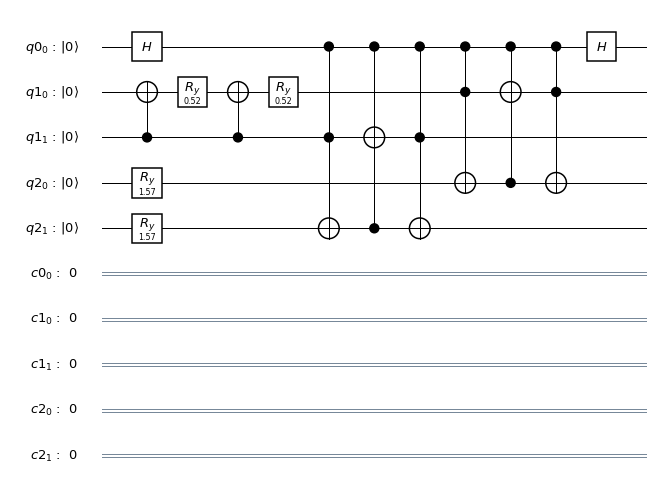

In [5]:
Circuit.draw(output='mpl')

In [6]:
# 对寄存器q0进行测量
Circuit.measure(q0,c0)

In [7]:
# 测量次数设置为1024次
backend = BasicAer.get_backend('qasm_simulator')
job = execute(Circuit, backend,shots=1024)
job.result().get_counts(Circuit)

{'00 00 1': 274, '00 00 0': 750}

In [8]:
Inner_product = np.sum(np.multiply(np.array(desired_vector1),np.array(desired_vector2)))
Overlap = Inner_product**2
P_0 = 1/2 + Overlap/2
print(P_0*1024)

750.8512516844081
